In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
mean_height = df['Height'].mean()
df['Height'] = df['Height'].fillna(mean_height)
mean_weight = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(mean_weight)

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


In [8]:
# Total medal by country
most_medals = df.groupby('NOC')['Medal'].count().sort_values(ascending = False)
most_medals.head(10)

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64

In [9]:
# Most sucessful athlete in olympics
top_athlete = df.groupby('Name')['Medal'].count().sort_values(ascending = False)
top_athlete.head(10)

Name
Michael Fred Phelps, II                 28
Larysa Semenivna Latynina (Diriy-)      18
Nikolay Yefimovich Andrianov            15
Takashi Ono                             13
Borys Anfiyanovych Shakhlin             13
Ole Einar Bjrndalen                     13
Edoardo Mangiarotti                     13
Natalie Anne Coughlin (-Hall)           12
Sawao Kato                              12
Dara Grace Torres (-Hoffman, -Minas)    12
Name: Medal, dtype: int64

Text(0, 0.5, 'Number of Athletes')

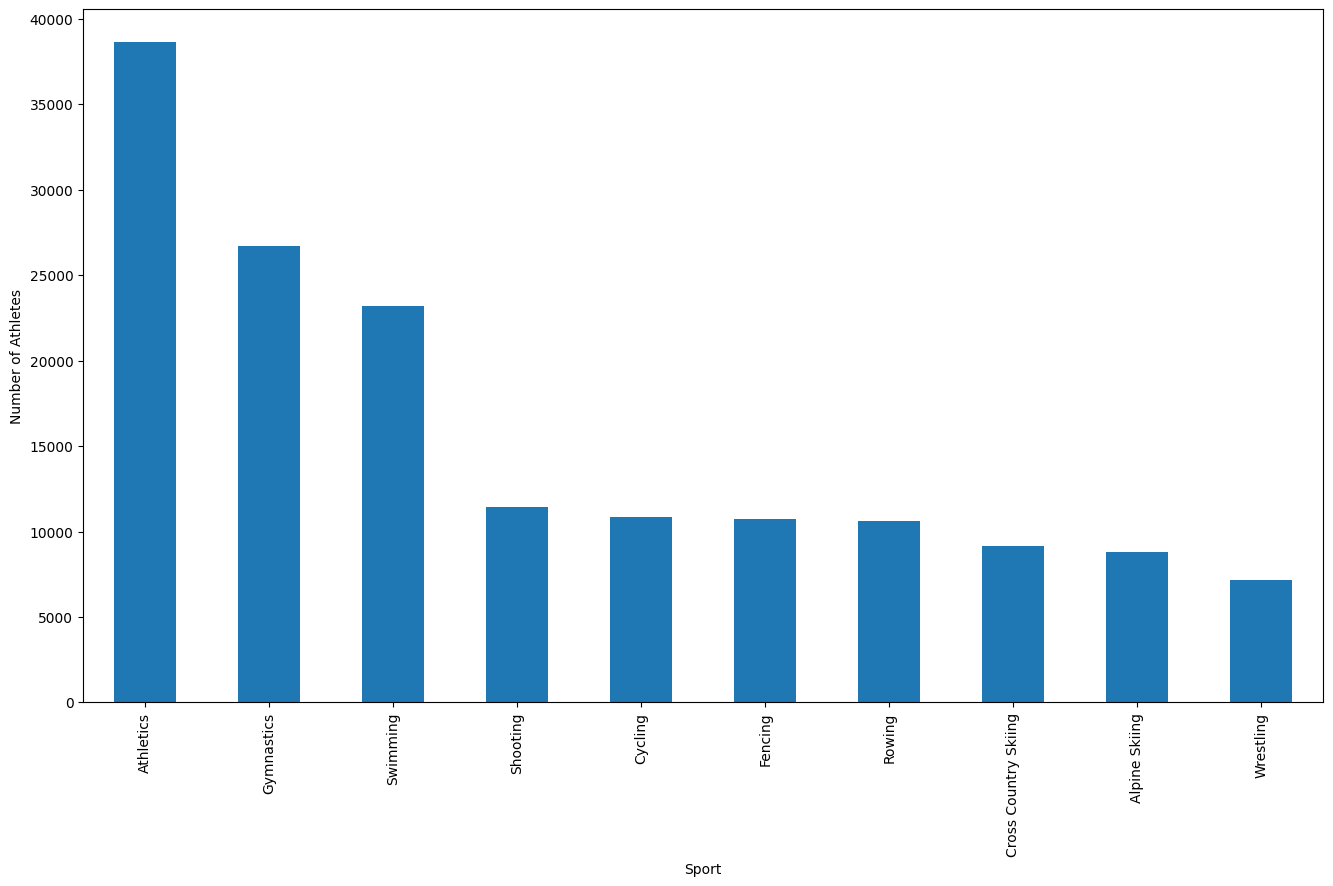

In [10]:
# Trends in popular sport
popular_sport = df['Sport'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize = (16,9))
popular_sport.plot(kind = 'bar')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')

<Axes: xlabel='Height', ylabel='Weight'>

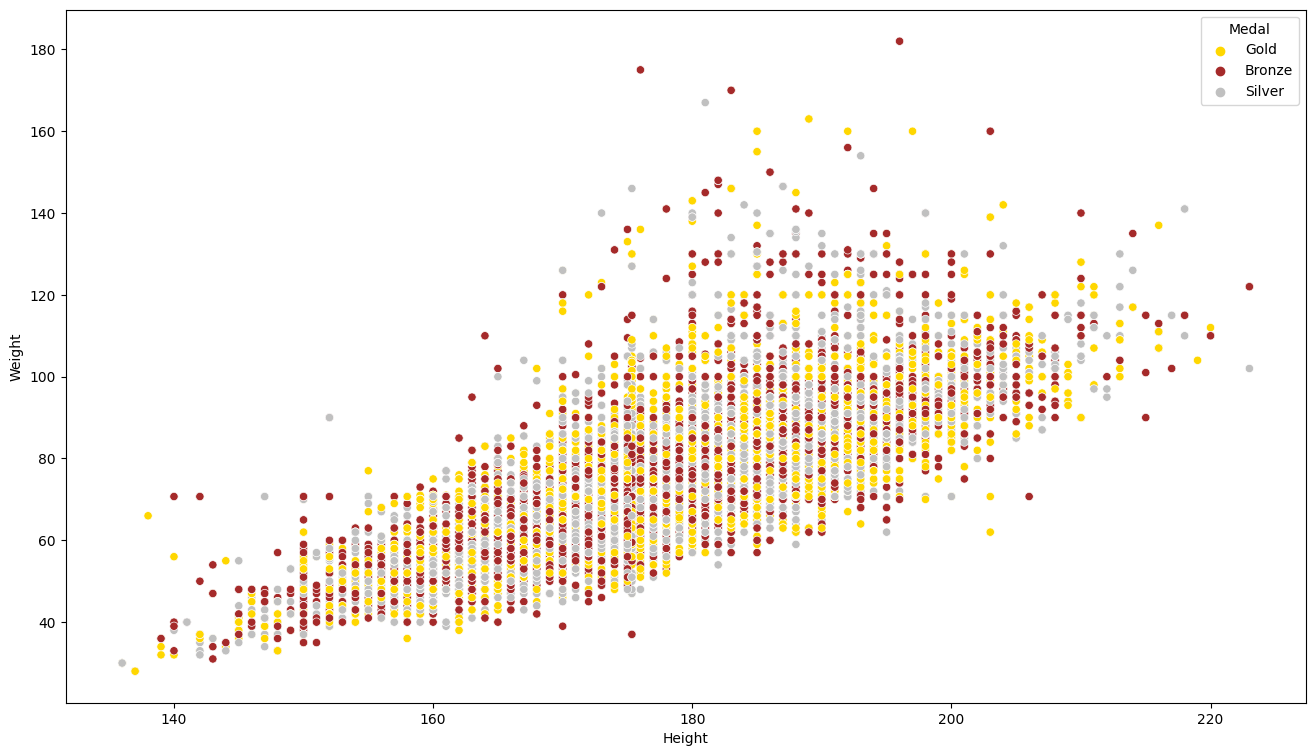

In [11]:
import seaborn as sns

# Define a dictionary mapping medal values to colors
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown', 'None': 'gray'}

# Create a scatter plot using seaborn
plt.figure(figsize = (16,9))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Medal', palette=colors)